In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pyplot import text
from google.colab import data_table
data_table.enable_dataframe_formatter()
# for fitting
# from numpy import arange
# from scipy.optimize import curve_fit

# **A/Ci curves experiment**

In [ ]:
file_path = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/2021-12-06-0933_logdata.xlsx"
df = pd.read_excel(file_path,sheet_name='Ac_data',index_col='Cc')
df

,Tradescantia_low_1,Tradescantia_low_2,Tradescantia_low_3,Tradescantia_medium_1,Tradescantia_medium_2,Tradescantia_medium_3,Tradescantia_high_1,Tradescantia_high_2,Tradescantia_high_3,Monalisa_low_1,...,Philodendron_medium_3,Philodendron_high_1,Philodendron_high_2,Philodendron_high_3,Chlorophytum_low_1,Chlorophytum_low_2,Chlorophytum_low_3,Chlorophytum_high_1,Chlorophytum_high_2,Chlorophytum_high_3
Cc,,,,,,,,,,,,,,,,,,,,,
1.0,-1.550557,-1.521021,-1.416632,-1.828117,-1.535441,-1.356170,-1.691048,-1.488221,-0.661809,-3.445689,...,-1.654441,-1.997824,-2.775086,-2.095173,-2.275653,-1.812221,-2.480802,-4.316836,-1.140920,-2.883853
2.0,-1.205387,-1.117481,-1.057232,-1.357436,-1.117167,-0.988033,-1.304061,-1.113424,-0.463875,-2.905084,...,-1.373051,-1.651424,-2.191250,-1.840594,-1.935305,-1.531792,-2.188140,-3.749227,-0.915721,-2.420436
3.0,-0.870880,-0.726407,-0.708936,-0.901296,-0.711815,-0.631270,-0.929030,-0.750206,-0.272057,-2.381181,...,-1.100353,-1.315726,-1.625450,-1.593880,-1.605471,-1.260026,-1.904520,-3.199155,-0.697480,-1.971337
4.0,-0.546551,-0.347231,-0.371236,-0.459033,-0.318796,-0.285360,-0.565409,-0.398039,-0.086075,-1.873216,...,-0.835953,-0.990241,-1.076864,-1.354672,-1.285672,-0.996529,-1.629528,-2.665818,-0.485878,-1.535901
5.0,-0.098685,0.020582,-0.043656,-0.030024,0.062446,0.050183,-0.035938,-0.056425,0.094334,-1.173245,...,-0.435090,-0.554845,-0.316961,-1.010744,-0.827241,-0.601089,-1.216300,-2.025943,-0.150600,-1.027134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273.0,6.899185,8.607369,6.973009,10.497020,9.661544,9.281426,8.172069,7.235057,7.848396,9.208352,...,5.408062,5.959408,9.453216,4.638122,6.691590,6.023157,5.709960,7.493937,5.598222,6.414628
274.0,6.899185,8.607369,6.973009,10.497020,9.661544,9.281426,8.172069,7.235057,7.848396,9.208352,...,5.408062,5.959408,9.453216,4.639160,6.692973,6.024375,5.711234,7.495688,5.599279,6.415996
275.0,6.899185,8.607369,6.973009,10.497020,9.661544,9.281426,8.172069,7.235057,7.848396,9.208352,...,5.408062,5.959408,9.453216,4.640192,6.694346,6.025585,5.712499,7.497426,5.600329,6.417355


In [ ]:
# Right now part of the data is not good so we will delete it:
# columns_to_drop = ['Peperomia_medium_2','Peperomia_high_1','Peperomia_high_3','Sphatophilum_high_2']
# df = df.drop(columns_to_drop, axis=1)
# df

In [ ]:
species = ['Tradescantia', 'Peperomia','Monalisa','Philodendron','Chlorophytum','Sphatophilum']
colors_dict = {'Tradescantia':"deeppink", 'Peperomia':"lime",'Monalisa':"red",'Philodendron':"forestgreen",'Chlorophytum':"cyan",'Sphatophilum':"Orange"}
ax_dict = {'Tradescantia':0, 'Peperomia':1,'Monalisa':2,'Philodendron':3,'Chlorophytum':4,'Sphatophilum':5}
ax_dict_sub = {'Tradescantia':(0, 0), 'Peperomia':(0, 1),'Monalisa':(0, 2),'Philodendron':(1, 0),'Chlorophytum':[1, 1],'Sphatophilum':(1, 2)}
ax_dict_a = {'Tradescantia':"a", 'Peperomia':"b",'Monalisa':"c",'Philodendron':'d','Chlorophytum':"e",'Sphatophilum':"f"}

In [ ]:
file_path = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/2021-12-06-0933_logdata.xlsx"
df_parameters = pd.read_excel(file_path,sheet_name='Erors')
df_parameters

,Plant,Eror,Vcmax,J,TPU,Rd*,gm,ratio_Ca_Ci,meas_pa
0,Tradescantia_low_1,0.050000,20.852393,31.542325,2.300530,0.396271,5.077164,1.473372,101.580560
1,Tradescantia_low_2,0.131332,24.378662,40.512214,2.870123,0.171668,6.752479,1.493281,101.522738
2,Tradescantia_low_3,0.091000,21.712017,33.066642,2.325147,0.214849,1.623558,1.456824,101.462296
3,Tradescantia_medium_1,0.122000,28.434754,49.681289,3.500226,0.254236,2.882858,1.614483,101.356316
4,Tradescantia_medium_2,0.108000,25.268721,48.120155,3.221637,0.136841,0.766602,1.787502,101.320615
5,Tradescantia_medium_3,0.210000,22.239844,42.445610,3.094887,0.125214,2.713534,1.533032,101.308191
6,Tradescantia_high_1,0.164000,23.378592,38.260647,2.724972,0.396945,8.647791,1.410570,101.207266
7,Tradescantia_high_2,0.326000,22.642182,34.745495,2.412526,0.234947,1.140107,1.410626,101.179138
8,Tradescantia_high_3,0.707000,11.957516,35.177257,2.617044,0.000000,1.180042,1.772783,101.161975
9,Monalisa_low_1,0.197000,32.658975,49.245361,3.070521,1.637398,1.335145,1.515500,100.544892


#### **Now i will create a dictionary: every plant will get his value of gm and Ci/Ca for converting**

In [ ]:
dict_gm = dict(zip(df_parameters.Plant, df_parameters.gm))
dict_ratio = dict(zip(df_parameters.Plant, df_parameters.ratio_Ca_Ci))
dict_convert_cica = dict(zip(df_parameters.Plant, df_parameters.meas_pa))
# dict_ratio,dict_gm

in order to convert all the Cc to Ca we will:
1. create new df and convert Cc to Ca with:

   **convert Ci to cc**: $C_i = C_c+ A/g_m $. (you can find this eqution in the excel file while $c_c,c_i$ in Pa)
   
    **Convert Pa to ppm**: $C_i(Pa) = C_i(ppm) + \frac{(0.1+ Airpressure )}{1000}$
    
    While Air pressure is the average of air pressure of all samples in the specific curve (Pa)

    **Convert Ci to Ca**: i averaged the ratio Ca/Ci from licor measurment for each curve.
2. covert Ca to int
3. for every plant we we take the values of A per each vakue of Ca and put it in column in new df. **And then we will have index - Ca, and for each sample a column with A values.**
4. Change the negative values into 0.

In [ ]:
df_ca = df.copy()
# 1. create df for ca - index column
x_values = np.arange(0, 2000)
x_values=x_values.tolist()
df_dict = pd.DataFrame(x_values)
# 2. 
for column in df_ca.columns:
    df_dict[column] = "" # empty column to fill later
#     The convertion:
    df_ca[column + '_Ca'] = dict_ratio[column]*((df_ca.index + (df_ca[column]/dict_gm[column]))/((0.1+dict_convert_cica[column])/1000))
    keys_list = df_ca[column + '_Ca'].to_list()
    values_list = df_ca[column].to_list()
    zip_iterator = zip(keys_list, values_list) # Get pairs of elements.
    plant_dictionary = dict(zip_iterator) # Convert to dictionary.
    plant_dictionary= {int(k):float(v) for k, v in plant_dictionary.items()} #convert the keys to int in order to merge the values
    for i in df_dict.index:
        for k,v in plant_dictionary.items():
            if k==i:
                df_dict[column].loc[i] = plant_dictionary[k] #if the index in df_dict equal to the key - take the value into to column in df while the index = key          
df_dict = df_dict.apply(pd.to_numeric) # define the df as float values             
df_dict = df_dict.interpolate(method='linear',limit_direction='forward',  axis=0) # interpolate between the values from first value forward
df_dict[df_dict < 0] = 0 # replace vegative values with 0
df_dict = df_dict.rename(columns={df_dict.columns[0]: 'Ca'}) #change the ca column name
df_dict = df_dict.set_index('Ca') #set Ca the index column
df_dict

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Tradescantia_low_1,Tradescantia_low_2,Tradescantia_low_3,Tradescantia_medium_1,Tradescantia_medium_2,Tradescantia_medium_3,Tradescantia_high_1,Tradescantia_high_2,Tradescantia_high_3,Monalisa_low_1,...,Philodendron_medium_3,Philodendron_high_1,Philodendron_high_2,Philodendron_high_3,Chlorophytum_low_1,Chlorophytum_low_2,Chlorophytum_low_3,Chlorophytum_high_1,Chlorophytum_high_2,Chlorophytum_high_3
Ca,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
2,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
3,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
4,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.758712,8.607369,6.973009,10.49702,9.661544,9.281426,8.172069,7.235057,7.286405,9.208352,...,5.408062,5.703693,9.453216,4.252423,6.388801,5.762734,5.489509,6.814330,5.267666,5.99872
1996,6.758712,8.607369,6.973009,10.49702,9.661544,9.281426,8.172069,7.235057,7.287940,9.208352,...,5.408062,5.703693,9.453216,4.252423,6.388801,5.763048,5.489509,6.815041,5.267666,5.99872
1997,6.758712,8.607369,6.973009,10.49702,9.661544,9.281426,8.172069,7.235057,7.289475,9.208352,...,5.408062,5.703693,9.453216,4.252423,6.388801,5.763363,5.489509,6.815041,5.267666,5.99872


In [ ]:
# iteractive plot for caculte Ca of Amax:
pd.options.plotting.backend = "plotly"

fig = df_dict.plot(title="$A/C_a curves$", template="simple_white")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df for statistical analysis:
df_stat = df_dict.T
df_stat["species"] = 1
for value in df_stat.index.values:
    for plant in species:
      if plant in value:
        df_stat["species"].loc[value] = plant
df_stat["A_max"] = df_dict.max().T
df_stat = df_stat[["species", df_dict.T.columns[400],df_dict.T.columns[550],df_dict.T.columns[800],df_dict.T.columns[1200],"A_max"]]
df_stat = df_stat[:-1] #last row is not good
df_stat.to_excel("/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/stats_file.xlsx")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



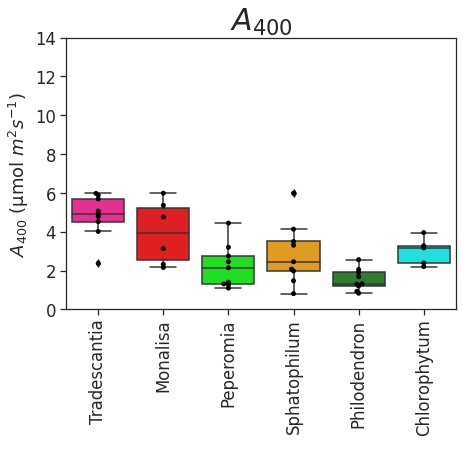

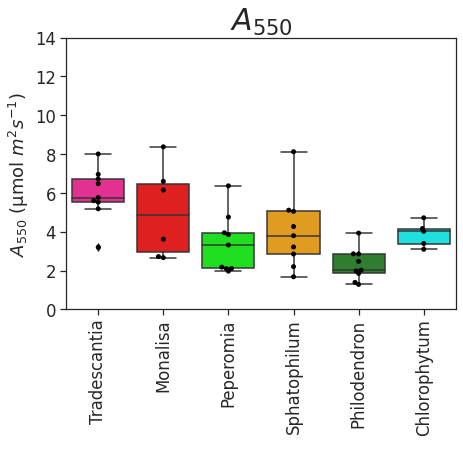

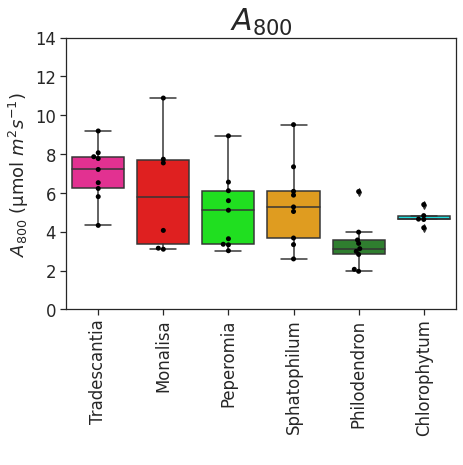

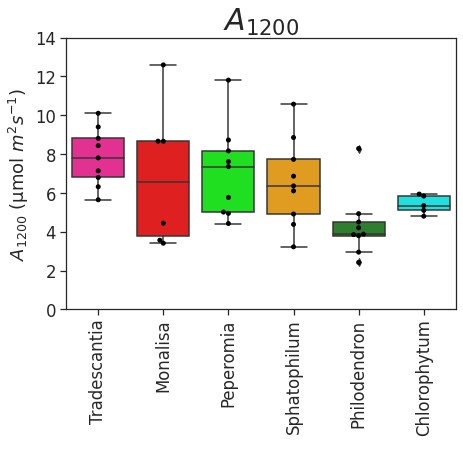

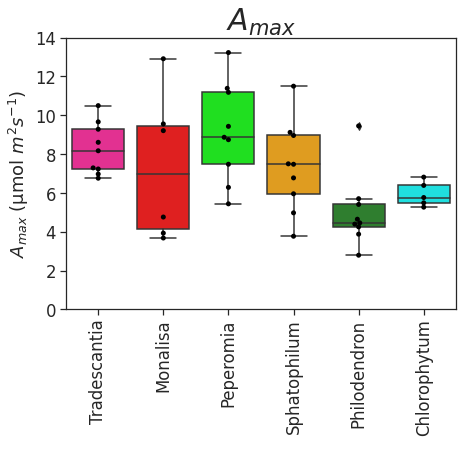

In [ ]:
# present in boxplots:
# 1 - replace tp float
for column in df_stat.columns[1:5]:
    df_stat[column] = df_stat[column].astype('float')

# dict dor axes
dict_for_boxplots = {df_stat.columns[1]:"$A_{400}$" , df_stat.columns[2]:"$A_{550}$", df_stat.columns[3]:"$A_{800}$", df_stat.columns[4]:"$A_{1200}$", df_stat.columns[5]:"$A_{max}$"}
# Boxplots
for column in df_stat.columns[1:]:
  plt.subplots(1, figsize=(7,5))
  a = sns.boxplot( data=df_stat, x='species', y=column,palette =colors_dict )
  a = sns.swarmplot( data=df_stat, x='species', y=column, color = "black")
  a.set_ylabel(dict_for_boxplots[column]+" (µmol $m^2 s^{-1}$)")
  a.set_xlabel(" ")
  a.set_title(dict_for_boxplots[column],fontsize = 30)
  a.set_ylim(0,14)
  plt.xticks(rotation=90)
  
  save_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Graphs/"
  plt.savefig(save_to +str(column)+ "boxplot.png",bbox_inches = "tight")
  pit.savefig("path_to_folder/name_of_figure.png",bbox_inches = "tight")

In [ ]:
df_species_avg = pd.DataFrame()
for plant_name in species:
    df_species_avg[plant_name + '_avg'] = df_dict[[column for column in df_dict.columns if plant_name in column]].mean(axis=1)
    df_species_avg[plant_name + '_std'] = df_dict[[column for column in df_dict.columns if plant_name in column]].std(axis=1)
# df_species_avg.to_csv("/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Avg_Ca.csv")

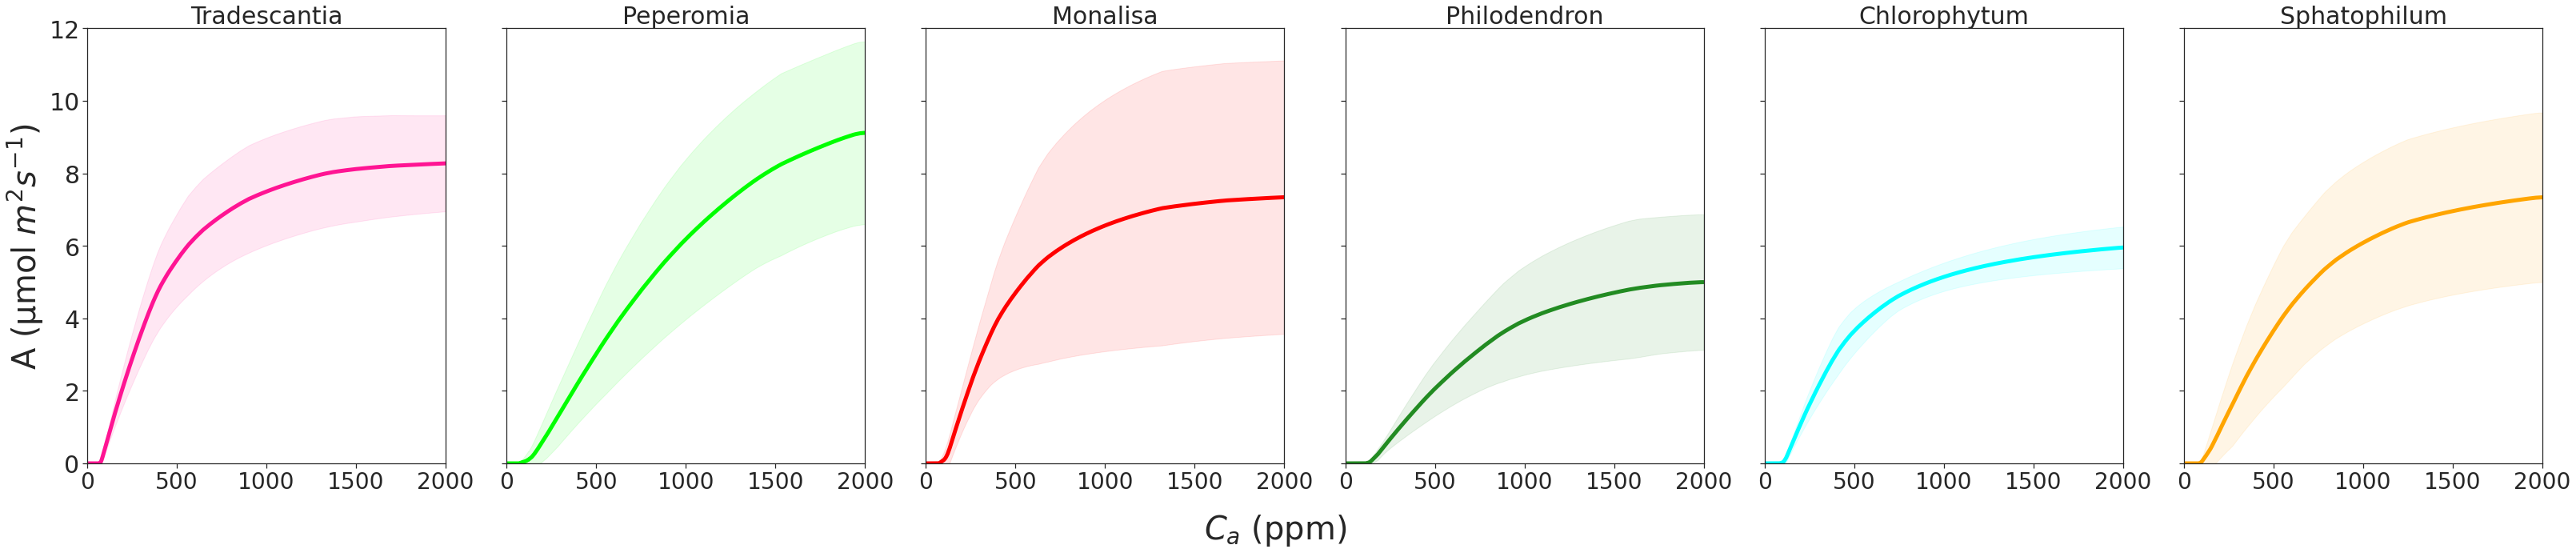

In [ ]:
fig, axes = plt.subplots(1, 6,sharex=True, figsize=(55,10))
for plant_name in species:
    a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_species_avg, x="Ca", y=plant_name+'_avg', color= colors_dict[plant_name],linewidth=5)
    a.fill_between(df_species_avg.index, df_species_avg[plant_name+'_avg'] + df_species_avg[plant_name+'_std'], df_species_avg[plant_name+'_avg']-df_species_avg[plant_name+'_std'],color=colors_dict[plant_name], alpha=.1
                  )
    a.set_title(plant_name,fontsize=30)
    a.set_xlabel(" ")
    a.set_ylabel('A (µmol $m^2 s^{-1}$)',fontsize=40)
    a.set_ylim(0,12)
    a.set_xlim(0,2000)
    a.label_outer() # for 1 y label
    a.xaxis.set_tick_params(labelsize=28)
    a.yaxis.set_tick_params(labelsize=30)
fig.text(0.5, 0.01, '$C_a$ (ppm)', va='center', ha='center', fontsize=40)
plt.subplots_adjust(hspace = .5,wspace=.17) #adjust the borders between the graph
save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Graphs/"
plt.savefig(save_results_to +'subplots.png',bbox_inches = "tight")

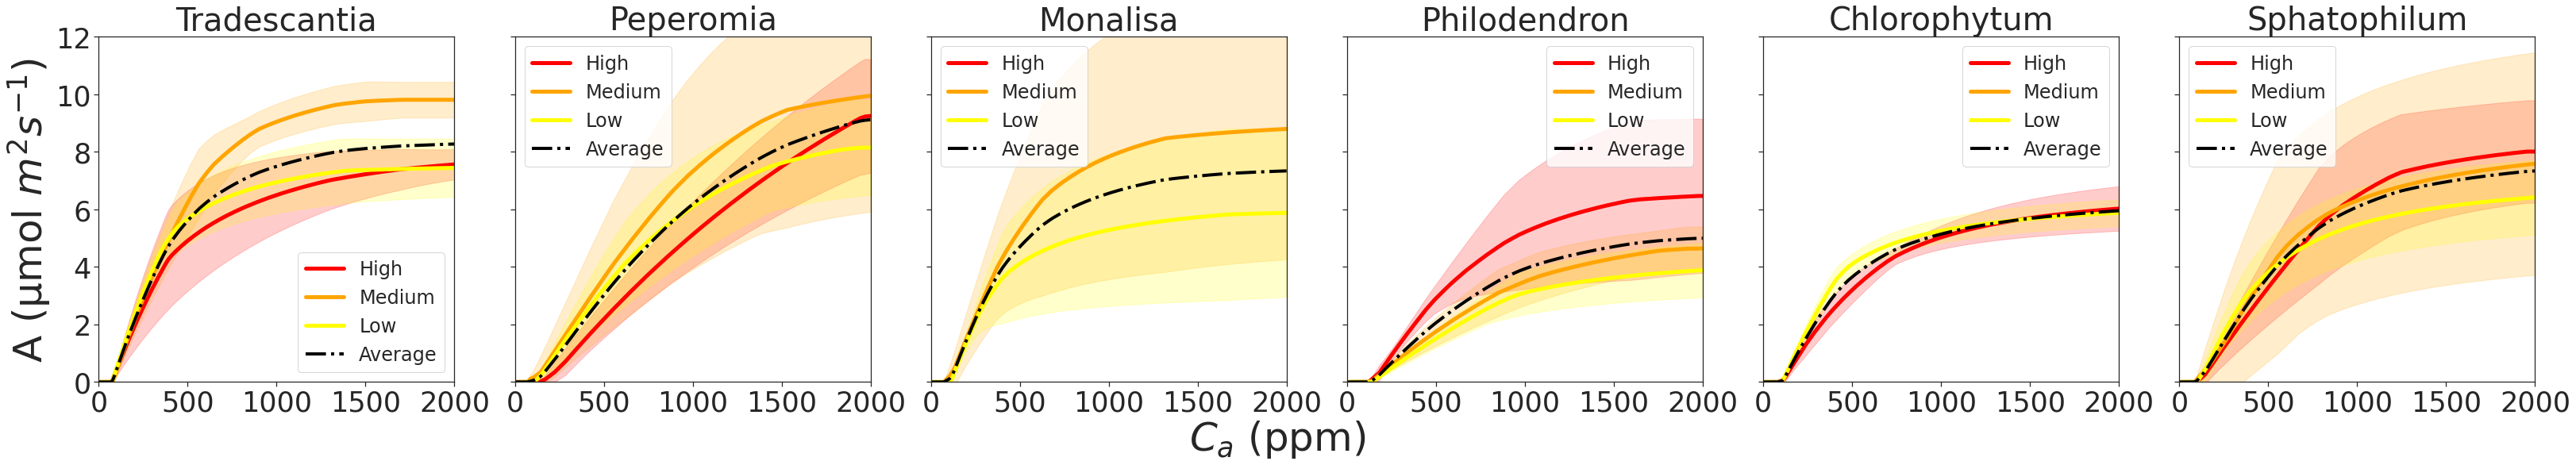

In [ ]:
light_levels = ['high', 'medium', 'low']
label_convert = {'low':'Low', 'medium': "Medium", 'high': "High"}
light_dict = {'low':'yellow', 'medium': "orange", 'high': "red"}
fig, axes = plt.subplots(1, 6,sharex=True, figsize=(55,8))
for plant_name in species:
    df_light_avg = pd.DataFrame()
    for level in light_levels:
        df_light_avg[level + "_avg"] = df_dict[[column for column in df_dict.columns if plant_name in column and level in column]].mean(axis=1)
        df_light_avg[level + '_std'] = df_dict[[column for column in df_dict.columns if plant_name in column and level in column]].std(axis=1)
        
        a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_light_avg, x="Ca", y=level + "_avg", color= light_dict[level],linewidth=5,label=label_convert[level])
        a.fill_between(df_light_avg.index, df_light_avg[level+"_avg"] + df_light_avg[level+'_std'], df_light_avg[level+"_avg"]-df_light_avg[level+'_std'],color=light_dict[level], alpha=.2 )
    a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_species_avg, x="Ca", y=plant_name+'_avg', color= "black",linewidth=4,linestyle = "dashdot",label="Average")
    a.set_title(plant_name,fontsize=40)
    a.set_xlabel(" ")
    a.set_ylabel('A (µmol $m^2 s^{-1}$)',fontsize=50)
    a.set_ylim(0,12)
    a.set_xlim(0,2000)
    a.label_outer() # for 1 y label
    a.xaxis.set_tick_params(labelsize=35)
    a.yaxis.set_tick_params(labelsize=35)
    a.legend(loc='best',fontsize=24)
fig.text(0.5, 0.001, '$C_a$ (ppm)', va='center', ha='center', fontsize=50)
plt.subplots_adjust(hspace = .5,wspace=.17) #adjust the borders between the graph
save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Graphs/"
plt.savefig(save_results_to +'_all_togather.png',bbox_inches = "tight")

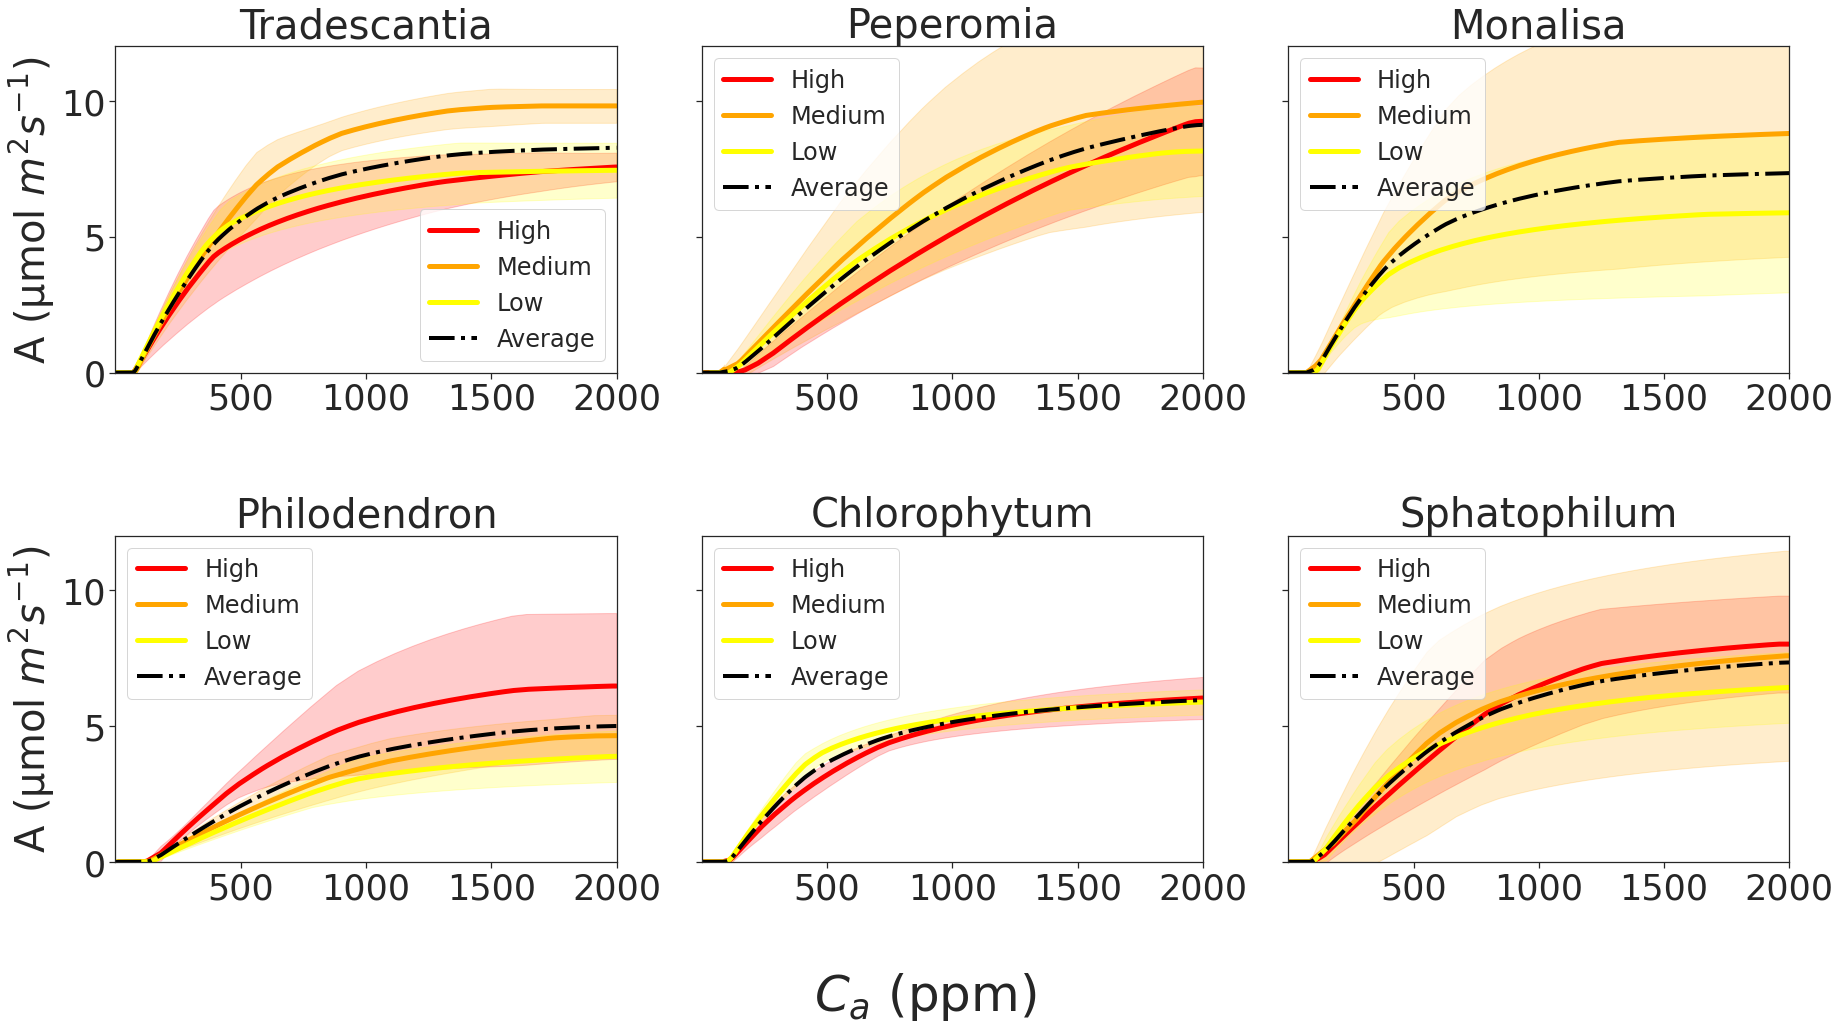

In [ ]:
fig, axes = plt.subplots(2, 3,sharex=False, figsize=(30,15))

for plant_name in species:
    df_light_avg = pd.DataFrame()
    for level in light_levels:
        df_light_avg[level + "_avg"] = df_dict[[column for column in df_dict.columns if plant_name in column and level in column]].mean(axis=1)
        df_light_avg[level + '_std'] = df_dict[[column for column in df_dict.columns if plant_name in column and level in column]].std(axis=1)
        
        a = sns.lineplot(ax=axes[ax_dict_sub[plant_name][0],ax_dict_sub[plant_name][1]],data=df_light_avg, x="Ca", y=level + "_avg", color= light_dict[level],linewidth=5,label=label_convert[level])
        a.fill_between(df_light_avg.index, df_light_avg[level+"_avg"] + df_light_avg[level+'_std'], df_light_avg[level+"_avg"]-df_light_avg[level+'_std'],color=light_dict[level], alpha=.2 )
    a = sns.lineplot(ax=axes[ax_dict_sub[plant_name][0],ax_dict_sub[plant_name][1]],data=df_species_avg, x="Ca", y=plant_name+'_avg', color= "black",linewidth=4,linestyle = "dashdot",label="Average")
    a.set_title(plant_name,fontsize=40)
    a.set_xlabel(" ")
    a.set_ylabel('A (µmol $m^2 s^{-1}$)',fontsize=40)
    a.set_ylim(0,12)
    a.set_xlim(0,2000)
    a.label_outer() # for 1 y label
    a.tick_params(labelbottom=True) # x tick labels to all the graphs
    a.xaxis.set_tick_params(labelsize=35)
    a.yaxis.set_tick_params(labelsize=35)
    a.legend(loc='best',fontsize=24)
    plt.setp(axes, xticks=[500, 1000, 1500,2000],yticks=[0, 5, 10])
fig.text(0.5, 0.001, '$C_a$ (ppm)', va='center', ha='center', fontsize=50)
plt.subplots_adjust(hspace = .5,wspace=.17) #adjust the borders between the graph
save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Graphs/"
plt.savefig(save_results_to +'_all_togather_subplots.png',bbox_inches = "tight")

**Now lets present it seperatly for look if we have some deviations:**

In [ ]:
graph_dict = {'low':0, 'medium': 1, 'high': 2}
for plant_name in species:
    df_species = pd.DataFrame(index = df_dict.index)
    fig, axes = plt.subplots(1, 3,sharex=True, figsize=(35,8))
    for column in df_dict.columns:
        if plant_name in column:
          df_species[column] = df_dict[column]
# untill now i create a seperate df for each species with all his samples. now i want to plot al the curves and saperate
# between the light regions with different color
          for column_name in df_species.columns:
              for level in light_levels:
                  if level in column_name:
                      ax = sns.lineplot(ax=axes[graph_dict[level]],x=df_species.index, y=column_name, data=df_species, color=light_dict[level],lw=2.5)
                      ax.set_title(plant_name+ " "+ level,fontsize=30)
                      ax.set_ylim(0,15)
                      ax.set_ylabel('A (µmol $m^2 s^{-1}$)',fontsize=30)
                      ax.xaxis.set_tick_params(labelsize=28)
    save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/Graphs/"
    plt.savefig(save_results_to + plant_name+'.png')

In [ ]:
df_dict

## Preproccesing of data

In [ ]:
# loading the data:
file_path = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/2021-12-06-0933_logdata.xlsx'
df = pd.read_excel(file_path,skiprows=14) # reading the raw date (xlsx)
df.drop(0)
# df_1 = df_1.dropna() # dropping Nan
df

In [ ]:
# Save the units of the columns and change the df
df_units =df.loc[0]
df_units
df = df.loc[1:] # without the units raw
df = df.rename(columns = {'Unnamed: 1':'Light_intensity'}) #changing the name of the column
df

In [ ]:
# df with the columns for A/Ci curve:
df_ac = df[['obs','PAR_light_out','Leaf','Ca','Ci','A', 'TleafEB']]
df_ac

# **Old analysis**

In [ ]:
file_path = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/AC_curve_results.xlsx'
df = pd.read_excel(open(file_path, 'rb'),
              sheet_name='curves')
df = df.set_index('Cc (Pa)')

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(df['chlorophytum_comosum'],color = "aqua",label='Chlorophytum comosum',  linewidth=3)
ax.plot(df['philodendron'],color = "seagreen",label='Philodendron',  linewidth=3)
ax.plot(df['Wandring_Jew'],color = "magenta",label='Wandering jew',  linewidth=3)
ax.plot(df['Spatophylium'],color = "goldenrod",label='Spatophylium',  linewidth=3)
ax.plot(df['Peperomia'],color = "lime",label='Peperomia',  linewidth=3)
ax.plot(df['monalisa'],color = "red",label='Monalisa',  linewidth=3)
plt.axhline(y=0, color = "black")
ax.set(xlabel="Cc [Pa]",
       ylabel="A [umol (CO2) m-2 s-1]",
       title="A / Cc curve");
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/'
plt.savefig(save_results_to + 'AC_low_light.png')

## **New Analysis**

In [ ]:
pip install openpyxl

In [ ]:
file_path = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Ac_curve/new_experiment_12_2021/2021-12-06-0933_logdata.xlsx'
df = pd.read_excel(file_path)
# df = pd.read_excel(file_path,sheet_name='Ac_data')
# # df = df.set_index('Cc')
df